In [206]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [207]:
class ScratchLinearRegression:
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data

    self.theta : 
    """
    def __init__(self, num_iter=100, no_bias=False, lr=1e-3, verbose=False):
        self.num_iter = num_iter
        self.no_bias = no_bias
        self.lr = lr
        self.verbose = verbose

        #attributes
        #self.coef_ = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])
        self.theta = np.array([])

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        if self.no_bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])

        self.theta = np.zeros(X.shape[1]).reshape((-1, 1))
        for i in range(self.num_iter):
            self.gradient_descent(X, y)  
            pred =  self._linear_hypothesis(X)
                
            loss = self.lossFunc(pred, y)
            self.loss = np.append(self.loss, loss)
            if self.verbose:
                #Output learning process when verbose is set to True
                print(f"At {i} iteration learning mse {loss}")
# problem 3        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if self.no_bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])
        pred = self._linear_hypothesis(X)

        pred = pred.ravel()
        return pred

# problem 1
    def _linear_hypothesis(self, x):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
        Training data

        Returns
        -------
        of the following form. ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function

        """
        return x @ self.theta
# problem 2  
    def gradient_descent(self, x, y):
        """
        Compute the hypothetical values of the linear function

        Parameters
        ------
        x: Features for model training
        y: Target variable

        Returns
        ------
        None
        """
        rows = x.shape[0]
        columns = x.shape[1]
        pred = self._linear_hypothesis(x)

        for column in range(columns):
            gradient = np.array([])
            for row in range(rows):
                a = (pred[row] - y[row]) * x[row, column]
                gradient = np.append(gradient, a)
            gradient = gradient.sum()
            self.theta[column] = self.theta[column] - ((self.lr * gradient)/rows)
# Problem 4    
    def MSE(self, y_pred, y):
        """
        Calculation of mean square error

        Parameters
        ----------
        y_pred : of the following form. ndarray, shape (n_samples,)
        Estimated value
        y : of the following form. ndarray, shape (n_samples,)
        Correct answer value

        Returns
        ----------
        mse : numpy.float
        Mean squared error
        """
        error = (y_pred - y)**2
        mse = np.average(error)
        return mse
    
    def lossFunc(self, y_pred, y):
        loss = self.MSE(y_pred, y) / len(y)   

        return loss
    
                
                
    


    


In [208]:
file = "./data/train.csv"

housing = pd.read_csv(file)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
feature = housing["GrLivArea"].values.reshape((-1, 1))
target = housing["SalePrice"].values




In [210]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size=0.2, random_state=123)

### Problem 6

In [211]:
model = ScratchLinearRegression(num_iter=1000, lr=1e-7, no_bias=True)
model.fit(x_train, y_train)

pred = model.predict(x_test)

Text(0.5, 1.0, 'Actual value vs Prediction')

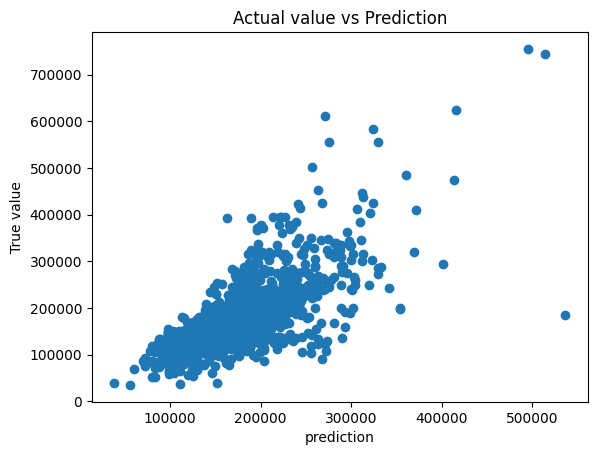

In [212]:
plt.scatter(pred, y_test)

plt.xlabel("prediction")
plt.ylabel("True value")
plt.title("Actual value vs Prediction")

### Problem 7

Text(0, 0.5, 'Loss')

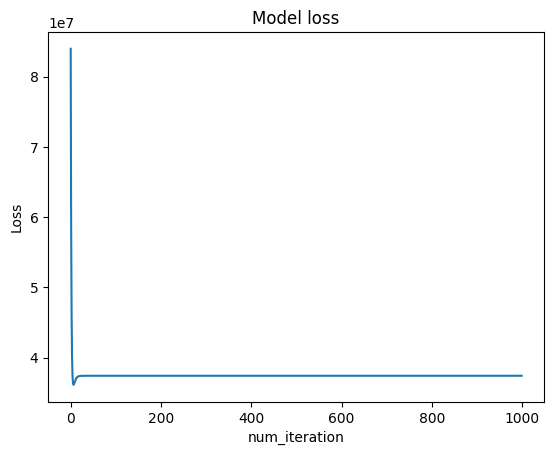

In [213]:
plt.plot(model.loss)
plt.title("Model loss")
plt.xlabel("num_iteration")
plt.ylabel("Loss")

In [214]:
# mean squar error when bais is set to true
T = model.MSE(pred, y_test)
T

3103101389.495414

### Problem 8
#### Removal of bais term

In [215]:
model = ScratchLinearRegression(num_iter=1000, lr=1e-7, no_bias=False)
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [216]:
# mean square error when bais is set to false
F = model.MSE(pred, y_test)
F


3103103040.0322943

In [217]:
print(f"When the bias term is used, the model an MSE score {(F - T)} better")

When the bias term is used, the model an MSE score 1650.536880493164 better


#### In context of linear regression models, bias refers to the y-intercept of th elinear equation. Without the bias, the model would pass through the origin. It also allows the line to be shifted up or down providing for a more flexible model. 

### Problem 9

In [218]:
feature = housing[["YearBuilt", "GrLivArea"]].values


x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=123)

In [219]:
model = ScratchLinearRegression(1000, True, 1e-7)

model.fit(x_train, y_train)

pred = model.predict(x_test)

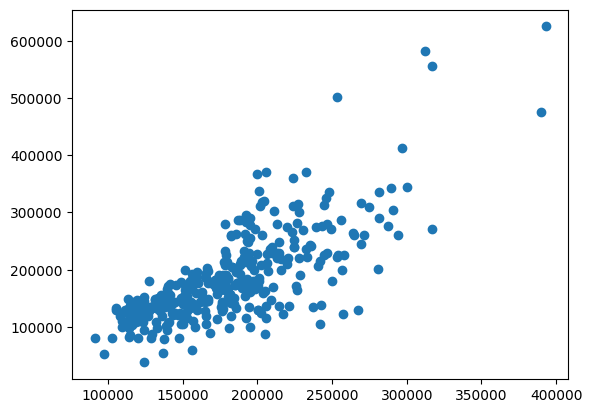

In [220]:
plt.scatter(pred, y_test)

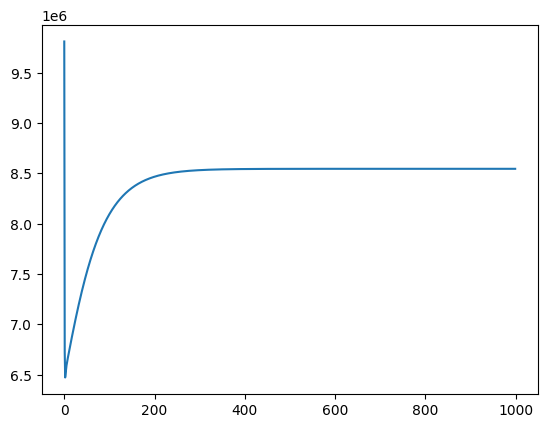

In [221]:
plt.plot(model.loss)

#### When more fearures where used for to trian the model, there was a significant inprovement in the performance of the model. 

#### The model converged at a lower loss value of about, compared to single feature model signifying an improved predictive performance. However, this peromance was not reflected in the accuracy of the prediction as the unidimensional model scored better than the multidimensional model. 


In [223]:
# mse of multidimension feature

md = model.MSE(pred, y_test)
perf = ((md-T)/md)

print(f"Perfomance {perf :.2%}")

Perfomance -13.96%


### Problem 10

####  The loss function is determined based on the principle of minimizing the difference between the predicted values of the model and the actual values in the training data. The formula is derived from the Mean square error, for every iteration, the loss should reduce approaching 0. 

#### The loss is simply the average of the sum of the square of the error. For every iteration, the error of the model should tend towards a limit. 

### Problem 11

#### Given that the MSE is the average sum of the square of the error

#### And the gradient descent ia updated by:
θ 
j
​
 =θ 
j
​
 −α 
∂θ /
j
∂
​
 MSE(θ)

Where α is the learning rate

#### Given that the MSE is a convex function, there is a single global minimum. The shape of the curve ensures that any local minimum is the global minimum. 

#### The gradient descent starts from an initial point and takes steps towards the steepest decrease in the objective function. Given a well-chosen learning rate, the gradient descent converges towards the global minimum. 